In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("C:/Users/Pranay/Desktop/heart_disease_data.csv.csv")

In [8]:
x = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']


x = x.fillna(x.median())


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)
regressor.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
#prediction
y_pred = regressor.predict(x_test)
y_pred_proba = regressor.predict_proba(x_test)[:, 1]


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [20]:
print(accuracy)
print(conf_matrix)

0.8529874213836478
[[1070    6]
 [ 181   15]]


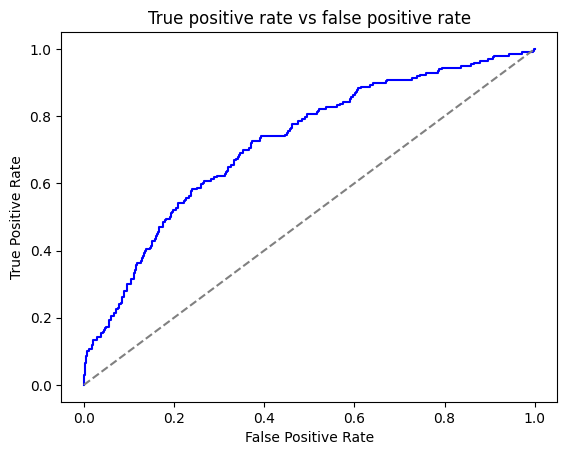

In [21]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('True positive rate vs false positive rate')
plt.show()


In [22]:
#confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Breakdown:
True Negatives (TN): 1070
False Positives (FP): 6
False Negatives (FN): 181
True Positives (TP): 15


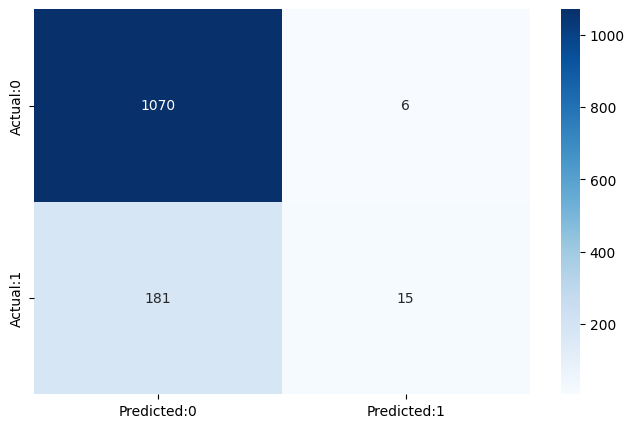

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1076
           1       0.71      0.08      0.14       196

    accuracy                           0.85      1272
   macro avg       0.78      0.54      0.53      1272
weighted avg       0.83      0.85      0.80      1272



In [26]:
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))